In [1]:
import cryoenv.cryosig as cs
import numpy as np
import time
from scipy.constants import e
from tqdm.auto import trange
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']

In [2]:
det = cs.DetectorModule(
    record_length=16384,
    sample_frequency=25000,
    C=np.array([5e-5, 5e-4]),
    Gb=np.array([0.005, 0.005]),
    G=np.array([[0.   , 0.001],
       [0.001, 0.   ]]),
    lamb=0.003,
    eps=np.array([0.1, 0.9]),
    delta=np.array([0.02, 0.98]),
    Rs=np.array([0.035]),
    Rh=np.array([10]),
    Rt0=0.2,
    L=np.array([3.5e-07]),
    k=2.0,
    Tc=15.0,
    Ib=1.0,
    dac=np.array([0.]),
    pulser_scale=1.0,
    heater_attenuator=1.0,
    tes_flag=np.array([ True, False]),
    heater_flag=np.array([False,  True]),
    dac_ramping_speed=np.array([0.002]),
    Ib_ramping_speed=np.array([0.005]),
    xi=1.0,
    i_sq=np.array([2.e-12]),
    tes_fluct=np.array([0.0005]),
    emi=np.array([2.e-10]),
    lowpass=10000.0,
    Rt=None, 
    C_out=np.array([1]),
)

In [3]:
det.set_control(dac=[1], Ib=[1], norm=False)

In [11]:
det.wait(5)
print(det.dac, det.U_sq_Rh)

[1] [0.80427878]


In [12]:
det.trigger(er=0., tpa=1., verb=True)


T0 is [14.80629195 24.77093546] mK.
Calculated in 0.0703880786895752 s.
Generated noise in 0.0045011043548583984 s.


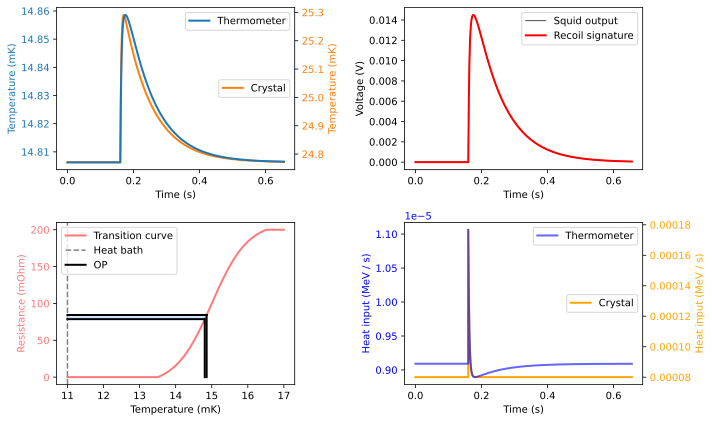

In [13]:
det.plot_event()


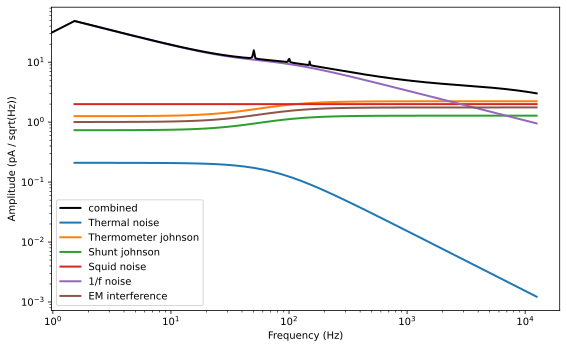

In [14]:
det.plot_nps(only_sum=False)
